In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score as ras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
df = pd.read_csv('parkinsons.data',header=0, delimiter=',')

In [3]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
df = df.iloc[: , 1:]
print(f'df null values: {df.isnull().sum(axis=1).sum()}')
print(f'df NaN values: {df.isna().sum(axis=1).sum()}')

df null values: 0
df NaN values: 0


**How to Check the Distribution of Data in a DataFrame**


1.   Visualization Techniques


*   Histogram
*   Boxplot


2.   Statistical Methods


*   Describe()
*   Skewness and Kurtosis

```
Skewness > 0: Right-skewed.
Skewness < 0: Left-skewed.
Kurtosis > 0: More peaked than normal distribution.
Kurtosis < 0: Flatter than normal distribution.
```







In [7]:
skewness = df.select_dtypes(include=['number']).skew()
kurtosis = df.select_dtypes(include=['number']).kurt()

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

Skewness:
 MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

Kurtosis:
 MDVP:Fo(Hz)         -0.627898
MDVP:Fhi(Hz)         7.627241
MDVP:Flo(Hz)         0.654615
MDVP:Jitter(%)      12.030939
MDVP:Jitter(Abs)    10.869043
MDVP:RAP            14.213798
MDVP:PPQ            11.963922
Jitter:DDP          14.224762
MDVP:Shimmer         3.238308
MDVP:Shimmer(dB)     5.12

Z-score: Works well with normally distributed data.

IQR: More robust for skewed data.

In [8]:
 # Find and Remove Outliers Using Z-Score (Standard Score Method)

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Find rows with Z-score > 3
outliers = (z_scores > 3).any(axis=1)

# Display outliers
df_outliers = df[outliers]
print(df_outliers)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
73       112.014       588.518       107.024         0.00533   
89       179.711       225.930       144.878         0.00709   
99       126.512       141.756        99.770         0.01936   
100      125.641       141.068       116.346         0.03316   
102      139.224       586.567        66.157         0.03011   
115      151.872       492.892        69.085         0.00856   
120      128.940       479.697        88.251         0.00581   
146      169.774       191.759       151.451         0.01568   
149      202.632       565.740       177.258         0.01627   
151      192.818       224.429       168.793         0.03107   
152      198.116       233.099       174.478         0.02714   
157      117.963       134.209       100.757         0.01813   
186      116.556       592.030        86.228         0.00496   
187      116.342       581.289        94.246         0.00267   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:P

In [9]:
df = df[~outliers]

In [10]:
df.reset_index(drop=True, inplace=True)

In [ ]:
#  # Find and Remove Outliers Using the IQR (Interquartile Range Method)
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# # Define bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Find outliers
# outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# # Display outliers
# df_outliers = df[outliers]
# print(df_outliers)

In [11]:
y = df.loc[:, df.columns == 'status']
df = df.loc[:, df.columns != 'status']

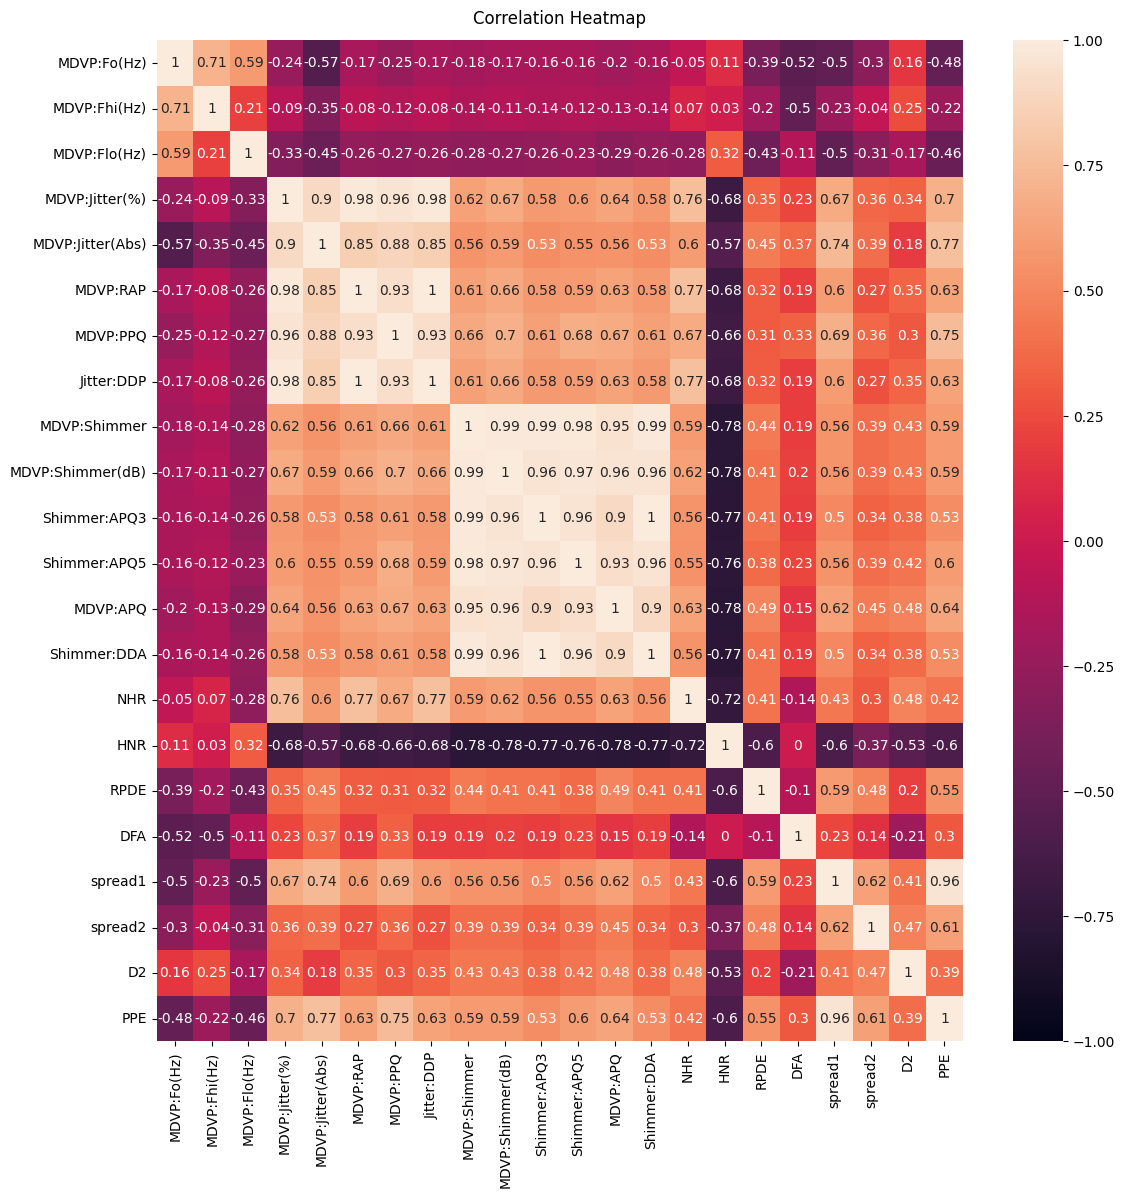

In [12]:
# Removing Highly Correlated Columns
correlation_matrix = df.corr()
correlation_matrix = correlation_matrix.round(2)

plt.figure(figsize=(13, 13))
heatmap = sns.heatmap(correlation_matrix,vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


In [13]:
# Set correlation threshold
threshold = 0.75

# Create an upper triangle matrix to avoid duplicate checks
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find columns with high correlation
high_correlation_columns = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > threshold)]

print("Highly Correlated Columns to Remove:")
print(high_correlation_columns)

Highly Correlated Columns to Remove:
['MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'PPE']


In [14]:
# Drop highly correlated columns
df_reduced = df.drop(columns=high_correlation_columns)

print("Remaining Columns:")
print(df_reduced.columns)

Remaining Columns:
Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Shimmer', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2'],
      dtype='object')


In [15]:
df_reduced

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,RPDE,DFA,spread1,spread2,D2
0,119.992,157.302,74.997,0.00784,0.04374,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.06134,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,0.05233,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,0.05492,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,0.06425,0.417356,0.823484,-3.747787,0.234513,2.332180
...,...,...,...,...,...,...,...,...,...,...
176,174.188,230.978,94.261,0.00459,0.04087,0.448439,0.657899,-6.538586,0.121952,2.657476
177,209.516,253.017,89.488,0.00564,0.02751,0.431674,0.683244,-6.195325,0.129303,2.784312
178,174.688,240.005,74.287,0.01360,0.02308,0.407567,0.655683,-6.787197,0.158453,2.679772
179,198.764,396.961,74.904,0.00740,0.02296,0.451221,0.643956,-6.744577,0.207454,2.138608


In [16]:
y.value_counts()

,count
status,
1,135
0,46


In [17]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_reduced)
# create a new DataFrame with the scaled data
x_scaled = pd.DataFrame(df_scaled, columns=df_reduced.columns)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=10, shuffle=True)

In [19]:
X_train.shape, X_test.shape

((121, 10), (60, 10))

In [20]:
# Convert to 1D
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [21]:
# Calculate class distribution for XGBClassifier
class_counts = np.bincount(y_train)
scale_pos_weight = class_counts[0] / class_counts[1]

models = [LogisticRegression(class_weight='balanced'),
          XGBClassifier(scale_pos_weight=scale_pos_weight),
          SVC(kernel='rbf',probability=True, class_weight='balanced')]

train_preds = []
test_preds = []

for model in range(len(models)):
    models[model].fit(X_train, y_train)

    print(f'{models[model].__class__.__name__}: ')

    train_preds.append(models[model].predict_proba(X_train)[:, 1])
    print('\t Training Accuracy : ', ras(y_train, train_preds[model]))

    test_preds.append(models[model].predict_proba(X_test)[:, 1])
    print('\t Validation Accuracy : ', ras(y_test, test_preds[model]))

LogisticRegression: 
	 Training Accuracy :  0.8984257871064467
	 Validation Accuracy :  0.9452804377564978
XGBClassifier: 
	 Training Accuracy :  1.0
	 Validation Accuracy :  0.9562243502051984
SVC: 
	 Training Accuracy :  0.9921289355322338
	 Validation Accuracy :  0.972640218878249


In [24]:
for model in range(len(test_preds)):
  test_preds[model] = (test_preds[model] >= 0.5).astype(int)
  print(test_preds[model])

[1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0]
[1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0]
[1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1]


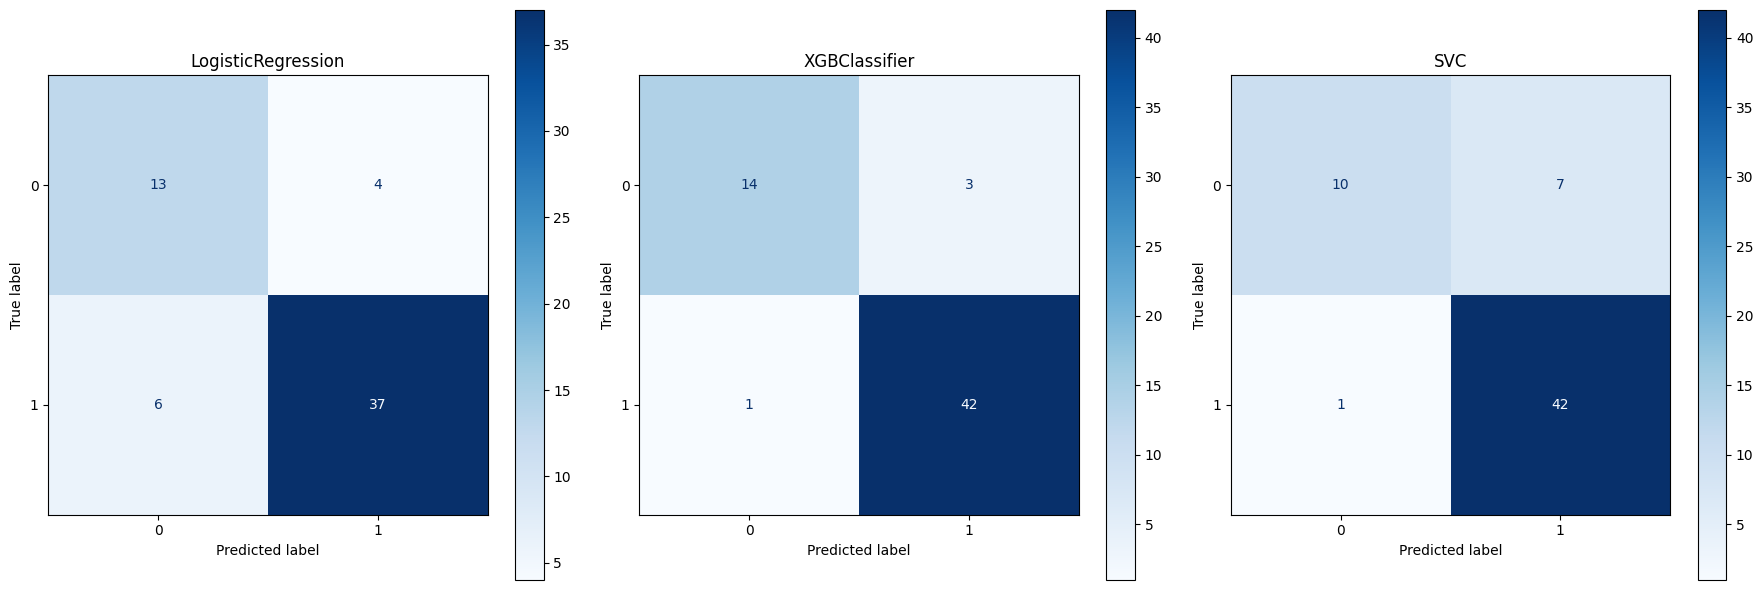

In [25]:
# Example setup for 3 models
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Dummy model predictions (replace with your actual model outputs)
for ii in range(len(axes)):
    cm = confusion_matrix(y_test, test_preds[ii])
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=axes[ii], cmap='Blues')
    axes[ii].title.set_text(models[ii].__class__.__name__)


plt.tight_layout()
plt.show()

In [26]:
for ii in range(len(test_preds)):
  print(models[ii].__class__.__name__)
  print(classification_report(y_test, test_preds[ii]))

LogisticRegression
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        17
           1       0.90      0.86      0.88        43

    accuracy                           0.83        60
   macro avg       0.79      0.81      0.80        60
weighted avg       0.84      0.83      0.84        60

XGBClassifier
              precision    recall  f1-score   support

           0       0.93      0.82      0.88        17
           1       0.93      0.98      0.95        43

    accuracy                           0.93        60
   macro avg       0.93      0.90      0.91        60
weighted avg       0.93      0.93      0.93        60

SVC
              precision    recall  f1-score   support

           0       0.91      0.59      0.71        17
           1       0.86      0.98      0.91        43

    accuracy                           0.87        60
   macro avg       0.88      0.78      0.81        60
weighted avg       0.87      0.87    